<a href="https://colab.research.google.com/github/hyp3r5pace/Machine-learning-lab/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**


# **Part (a) and (b)**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
import math
import copy

# to prevent ipython from priniting any warning
warnings.filterwarnings('ignore')

In [ ]:
# load the iris dataset

iris = datasets.load_iris()

# loading the feature sample dataset into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# function to calculate the distance between  two points
def calcDistance(point_a, point_b):
  # using euclidian distance
  sum = 0
  for i in range(len(point_a)):
    sum += (point_a[i] - point_b[i]) ** 2
  return math.sqrt(sum)

# function to assign cluster to datapoints on the basis of a set of centroids
def assignCluster(centroidPoints, dataPoints):
  assignedCluster = [None for i in range(len(dataPoints))]
  for i in range(len(dataPoints)):
    min, temp = float('Inf'), 0
    for j in range(len(centroidPoints)):
      dist = calcDistance(centroidPoints[j], dataPoints[i])
      if (dist < min):
        min = dist
        temp = j
    assignedCluster[i] = temp
  
  return assignedCluster

# function to calculate new centroid points on the basis of average of points assgined to each cluster
def calcNewCentroid(assignedCluster, dataPoints, k):
  newCentroids = []
  for i in range(k):
    sum, count = [0, 0, 0, 0], 0
    #print(assignedCluster)
    for j in range(len(assignedCluster)):
      if (assignedCluster[j] == i):
        sum = [sum[p] + dataPoints[j][p] for p in range(4)]
        count += 1
    newCentroids.append([(sum[p] / count) for p in range(4)])
  return newCentroids

# function to perform the K-Mean Clustering
def kMeanClustering(startingPoint, dataPoints):
  # assigning cluster to the data points
  assignedCluster = assignCluster(startingPoint, dataPoints)

  oldCentroids = copy.deepcopy(startingPoint)
  # computing the new centroid points by finding the average of all the points in the cluster
  newCentroids = calcNewCentroid(assignedCluster, dataPoints, len(startingPoint))
  
  # assigning cluster points according to thew newly computed centroid points
  newAssignedCluster = assignCluster(newCentroids, dataPoints)
  
  # loop to keep evaluating new cnetroid and cluster assignment until no change
  while (True):
    change = 0
    for val in zip(assignedCluster, newAssignedCluster):
      if (val[0] != val[1]):
        change = 1
        break
    
    if (change == 0): break

    # compute the new centroid points
    oldCentroids = newCentroids
    newCentroids = calcNewCentroid(newAssignedCluster, dataPoints, len(oldCentroids))

    # compute the new cluster assignment for the new centroid points
    assignedCluster = newAssignedCluster
    newAssignedCluster = assignCluster(newCentroids, dataPoints)

  return newCentroids

# the K mean score we are considering is the average intra cluster distance for a certain value of k and set of centroids
def clusterEvaluation(centroids, dataPoints):
  # assign the cluster to each of the datapoints on the basis of the centroid
  assignedCluster = assignCluster(centroids, dataPoints)

  interClusterDistSum = [0 for i in range(len(centroids))]

  for i in range(len(assignedCluster)):
    interClusterDistSum[assignedCluster[i]] += calcDistance(centroids[assignedCluster[i]], dataPoints[i])
  
  return sum(interClusterDistSum) / len(interClusterDistSum)  # it returns the k mean score of a cluster

In [ ]:
# converting the panadas dataframe to list
dataPoints = df.values.tolist()

# initializing the value of k with 2
k =  2
index = [i for i in range(150)]
efficient_centroid = [0 for i in range(17)]
best_k_cluster_metrics = [0 for i in range(17)]
while (k <= 18):
  # generating 15 different sets of starting points for the certain value of k
  starting_points = []
  for i in range(15):
    temp = []
    for j in range(k):
      random.seed(j + k)
      randIndex = random.sample(index, 18)
      temp.append(copy.deepcopy(dataPoints[randIndex[random.choice([x for x in range(18)])]]))
    starting_points.append(temp)
  
  clusteringMetrics = []
  centroid_list = []
  for i in range(15):
    #print(starting_points[i])
    centroidPoints = kMeanClustering(starting_points[i], dataPoints)
    centroid_list.append(centroidPoints)
    clusteringMetrics.append(clusterEvaluation(centroidPoints, dataPoints))
  
  # finding the best starting point for each k value
  min, temp = float('Inf'), 0
  for i in range(len(clusteringMetrics)):
    if (clusteringMetrics[i] < min):
      min = clusteringMetrics[i]
      temp = i
  
  efficient_centroid[k-2] = centroid_list[temp]
  best_k_cluster_metrics[k-2] = clusteringMetrics[temp] 

  k += 1

In [ ]:
for i in range(len(efficient_centroid)):
  print('centroid point for K = %d Mean clustering algorithm' %(i+2))
  print(efficient_centroid[i])
  print('K mean score of this cluster = %d' %(best_k_cluster_metrics[i]))
  print('\n')

centroid point for K = 2 Mean clustering algorithm
[[6.30103092783505, 2.8865979381443303, 4.958762886597939, 1.6958762886597945], [5.005660377358491, 3.369811320754718, 1.560377358490566, 0.29056603773584894]]
K mean score of this cluster = 64


centroid point for K = 3 Mean clustering algorithm
[[4.7318181818181815, 2.9272727272727277, 1.7727272727272727, 0.35000000000000003], [6.314583333333331, 2.8958333333333335, 4.973958333333335, 1.7031250000000007], [5.19375, 3.6312499999999996, 1.4749999999999999, 0.2718749999999999]]
K mean score of this cluster = 41


centroid point for K = 4 Mean clustering algorithm
[[5.88360655737705, 2.740983606557377, 4.388524590163935, 1.4344262295081966], [5.370588235294117, 3.8, 1.5176470588235293, 0.2764705882352942], [4.818181818181818, 3.236363636363636, 1.4333333333333331, 0.23030303030303034], [6.853846153846153, 3.0769230769230766, 5.715384615384615, 2.053846153846153]]
K mean score of this cluster = 22


centroid point for K = 5 Mean clusterin

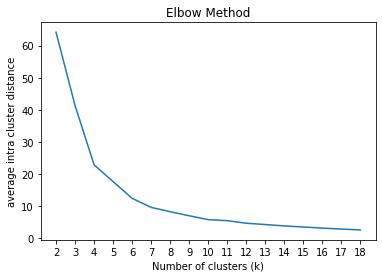

In [ ]:
ticks = [x for x in range(2, 19)]
plt.plot(ticks, best_k_cluster_metrics)
plt.xlabel('Number of clusters (k)')
plt.ylabel('average intra cluster distance')
plt.title('Elbow Method')
plt.xticks(ticks)
plt.show()

# **The appropiate value of k**

From the above graph and metrics, it is clear that **K = 7** is the appropiate cluster number for clustring the IRIS dataset, since an elbow is formed at K = 7 and the graph of K mean score (average intra cluster distance) v/s number of clusters starts to become close to flatline at k = 7

# **Part (c)**

**K means using in-built functions**

In [ ]:
from sklearn.cluster import KMeans

kMeanScore = []

for i in range(2, 20):
  kmeans = KMeans(n_clusters = i, init='k-means++', n_init = 15, random_state = 0)
  kmeans.fit(dataPoints)
  kMeanScore.append(kmeans.inertia_)

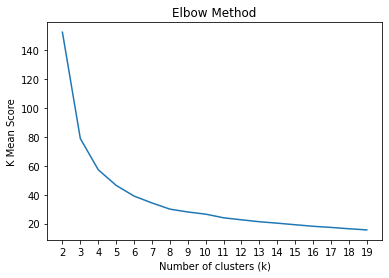

In [ ]:
ticks = [x for x in range(2, 20)]
plt.plot(ticks, kMeanScore)
plt.xlabel('Number of clusters (k)')
plt.ylabel('K Mean Score')
plt.title('Elbow Method')
plt.xticks(ticks=ticks)
plt.show()

# **Appropiate value of K**

From the above elbow curve, it is obvious that the curve has started to flatline near at **k = 7**
Thus, elbow curves generated by both k mean code from scratch and in-built function are similar.
Thus, k = 7 is the appropiate cluster number for clustering the IRIS dataset